In [41]:
# Questions
# Do we do HWE check on gangstr? check chr21:8993159
# Compute MI rate per locus, can filter on that?
# check low MI rate trios
# check sample whose trio we said was missing

In [42]:
%pylab inline

import pandas as pd
data = pd.read_csv("results/mend_chr21.tab", sep="\t", 
                   names=["chrom","pos","motif","sample","method","gbs","MI","gtscore","alscore"])

Populating the interactive namespace from numpy and matplotlib


[0.9343263417343983, 0.9394486443315294, 0.94059528186062, 0.940865685061442, 0.9409785072598567]
[0.9714313913737875, 0.9736494941960461, 0.9738214684486024, 0.9738881106636316, 0.9739322759212674]
[0.9861385636815164, 0.986444104611078, 0.9864108504933226, 0.9864275833268081, 0.9864469629707003]
[0.9724646094761756, 0.9719966922267328, 0.9719073949372611, 0.9718482951784847, 0.971851399801663]
[0.9708706440824253, 0.9721658281107483, 0.9721266753647254, 0.9719564697440803, 0.9719405306769572]
[0.9524835427887492, 0.9514814814814815, 0.9514759234828496, 0.95143187257572, 0.9514298683613255]
[0.8824742268041237, 0.8824742268041237, 0.8824742268041237, 0.8824742268041237, 0.8824742268041237]
[0.9343263417343983, 0.9343321094707547, 0.9343394028305143, 0.9393898515992892, 0.9408841009367127]
[0.9713565871780082, 0.9715551417587698, 0.9716404217238942, 0.9736394138254305, 0.97391513666105]
[0.9861389149329752, 0.9861389149329752, 0.9861361044227601, 0.9864465636985591, 0.9864275833268081]

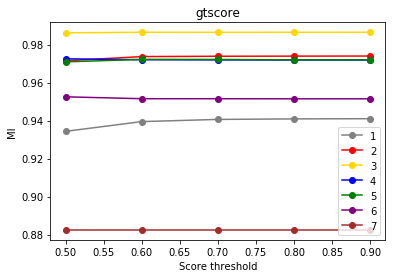

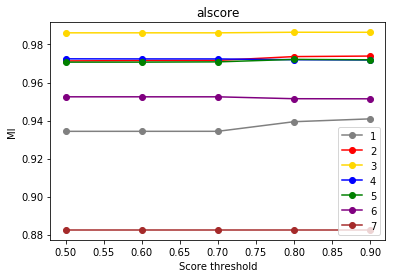

In [43]:
# MI vs. gtscore by period
percolors = ["gray","red","gold","blue","green","purple","brown"]

def PlotByScore(data, scorecol, percolors):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for period in range(1, 8):
        if period < 7:
            pdata = data[data["motif"].apply(len)==period].copy()
        else: pdata = data[data["motif"].apply(len)>=period].copy()
        mis = []
        ns = []
        thresh = np.arange(0.5, 1.0, 0.1)
        for t in thresh:
            mis.append(np.mean(pdata[pdata[scorecol]>=t]["MI"]))
            ns.append(pdata[pdata[scorecol]>=t].shape[0])
        ax.plot(thresh, mis, marker="o", color=percolors[period-1], label=period)
        print(mis)
    ax.set_xlabel("Score threshold")
    ax.set_ylabel("MI")
    ax.set_title(scorecol)
    ax.legend(loc="lower right")
    
PlotByScore(data, "gtscore", percolors)
PlotByScore(data, "alscore", percolors)

In [44]:
# by method (advntr|eh|hipstr|gangstr)
data["period"] = data["motif"].apply(len)
data.groupby(["method"], as_index=False).agg({"MI": np.mean, "sample": len}).sort_values(["MI"], ascending=False)

,method,MI,sample
6,0|1|1|1,0.990885,25782
5,0|1|1|0,0.983030,13141
1,0|0|1|0,0.977500,462538
3,0|1|0|0,0.977389,3715
4,0|1|0|1,0.972002,3536
2,0|0|1|1,0.939189,670342
0,0|0|0|1,0.888051,113712


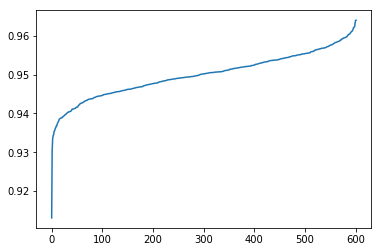

In [45]:
# by sample. check by ancestry
bysample = data.groupby("sample", as_index=False).agg({"MI": np.mean, "pos": len}).sort_values("MI")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(bysample.shape[0]), bysample["MI"])

In [46]:
bysample

,sample,MI,pos
276,HG02683,0.913023,2104
484,NA12485,0.930447,2056
455,NA10835,0.933530,2031
477,NA10865,0.934314,2040
426,HG04115,0.934535,2108
...,...,...,...
383,HG03516,0.962248,2278
530,NA19123,0.962321,2309
580,NA19757,0.963225,2121
231,HG02257,0.964038,2308


In [47]:
data[data["MI"]==False]

,chrom,pos,motif,sample,method,gbs,MI,gtscore,alscore,period
2,chr21,8993159,AAAG,HG01687,0|0|0|1,"0/-4,0/0,0/0",False,1.00,1.00,4
18,chr21,8993159,AAAG,HG02729,0|0|0|1,"0/-4,0/0,0/0",False,1.00,1.00,4
20,chr21,8993159,AAAG,HG02764,0|0|0|1,"0/-4,0/0,0/0",False,1.00,1.00,4
21,chr21,8993159,AAAG,HG02794,0|0|0|1,"0/-4,0/0,0/0",False,1.00,1.00,4
24,chr21,8993159,AAAG,HG02815,0|0|0|1,"0/-4,0/0,0/0",False,1.00,1.00,4
...,...,...,...,...,...,...,...,...,...,...
1292281,chr21,23424170,AAT,HG01126,0|0|1|1,"0/15,12/12,0/6",False,0.50,0.75,3
1292349,chr21,23424170,AAT,HG01627,0|0|1|1,"6/6,-9/-9,9/6",False,1.00,1.00,3
1292456,chr21,23424170,AAT,HG02563,0|0|1|1,"9/9,-9/9,12/6",False,1.00,1.00,3
1292460,chr21,23424170,AAT,HG02587,0|0|1|1,"0/9,-9/12,0/3",False,1.00,1.00,3
